This notebook is to document the testing of the implementation of GPP smoothing in FATES. 

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Choose runs to use

In [2]:
runs = ['clm5-fates_napi5_test_case', 'clm5-fates_napi4_smoothing_case','clm5-fates_napi5_test_case_noC4',  'clm5-fates_napi4_smoothing_case_noC4']

Choose years, variables, etc.

In [3]:
year = '2003'
month = '07'

Read data

In [4]:
print(runs)
run = runs[0]
scratch = '/glade/scratch/rfisher/'
file = scratch + run + '/run/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
#file = scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
no_sm = xr.open_dataset(file)

run = runs[1]
file = scratch + run + '/run/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
#file = scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
sm = xr.open_dataset(file)

run = runs[2]
file = scratch + run + '/run/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
#file = scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
no_sm_nC4 = xr.open_dataset(file)

run = runs[3]
file = scratch + run + '/run/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
#file = scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
sm_nC4 = xr.open_dataset(file)


['clm5-fates_napi5_test_case', 'clm5-fates_napi4_smoothing_case', 'clm5-fates_napi5_test_case_noC4', 'clm5-fates_napi4_smoothing_case_noC4']


Calculate deltas

In [9]:
gppns = no_sm.GPP
gpps = sm.GPP
gpps_nC4 = sm_nC4.GPP
gppns_nC4 = no_sm_nC4.GPP
diff = gppns/gpps

diff_sm_nC4 = gppns_nC4/gpps_nC4
diff_sm     = gppns/gpps

diff_nC4_sm = gpps/gppns_nC4
diff_nC4_nsm= gppns/gppns_nC4

Text(0.5, 1, 'diff_C4_nsm')

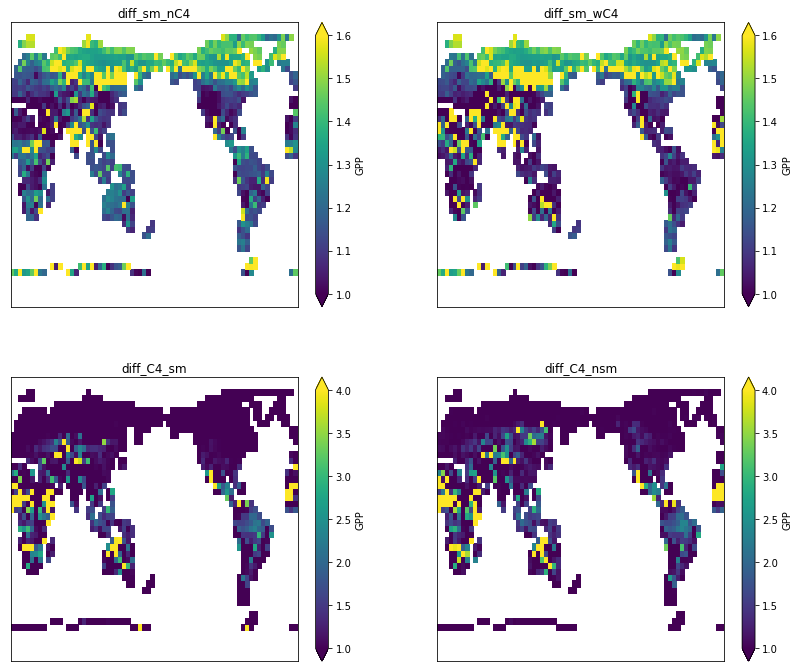

In [6]:
plt.rcParams['figure.figsize'] = [12, 10]

plt.rcParams['figure.figsize'] = [12, 10]
fig,([ax0, ax1], [ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
vm=1;vx=1.6
diff_sm_nC4.plot (ax=ax0,vmin=vm,vmax=vx)
diff_sm.plot      (ax=ax1,vmin=vm,vmax=vx)
vx=4
diff_nC4_sm.plot (ax=ax2,vmin=vm,vmax=vx)
diff_nC4_nsm.plot  (ax=ax3,vmin=vm,vmax=vx)
plt.tight_layout()

ax0.axes.get_xaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
ax3.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax0.set_title('diff_sm_nC4')
ax1.set_title('diff_sm_wC4')
ax2.set_title('diff_C4_sm')
ax3.set_title('diff_C4_nsm')


Check PFTs

Text(0.5, 1, 's nC4')

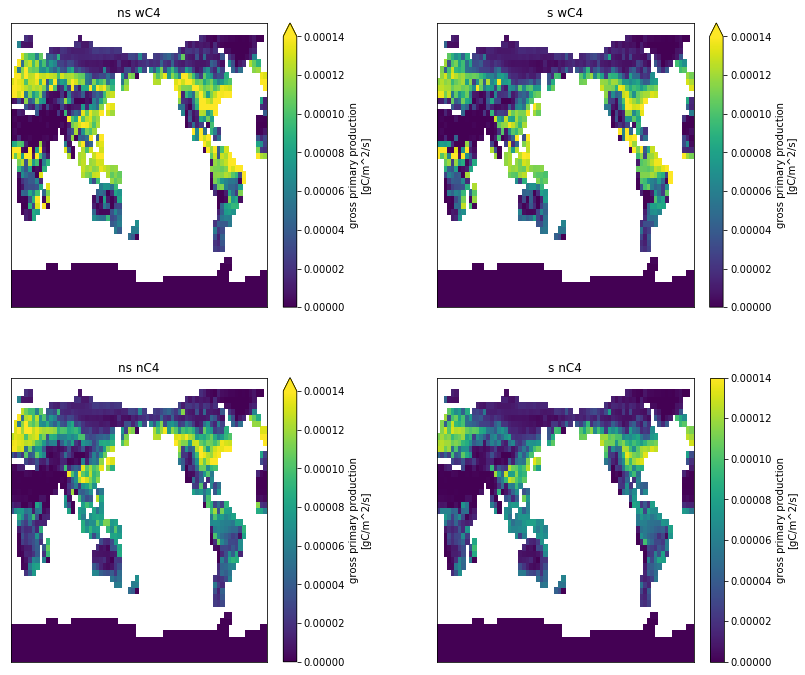

In [8]:
plt.rcParams['figure.figsize'] = [12, 10]
fig,([ax0, ax1], [ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
vm=0;vx=0.00014
gppns.plot (ax=ax0,vmin=vm,vmax=vx)
gpps.plot      (ax=ax1,vmin=vm,vmax=vx)
gppns_nC4.plot (ax=ax2,vmin=vm,vmax=vx)
gpps_nC4.plot  (ax=ax3,vmin=vm,vmax=vx)
plt.tight_layout()

ax0.axes.get_xaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
ax3.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax0.set_title('ns wC4')
ax1.set_title('s wC4')
ax2.set_title('ns nC4')
ax3.set_title('s nC4')
